2. Se dau mai multe imagini (salvate in folder-ul "data/images"). Se cere:

- sa se vizualizeze una din imagini;

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def load_images():
    images = []
    filenames = []
    for filename in os.listdir("images"):
        img = cv2.imread(os.path.join("images", filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

def display_image(image, title="Image"):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

images, filenames = load_images()
display_image(images[0], title=filenames[0])



- daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.


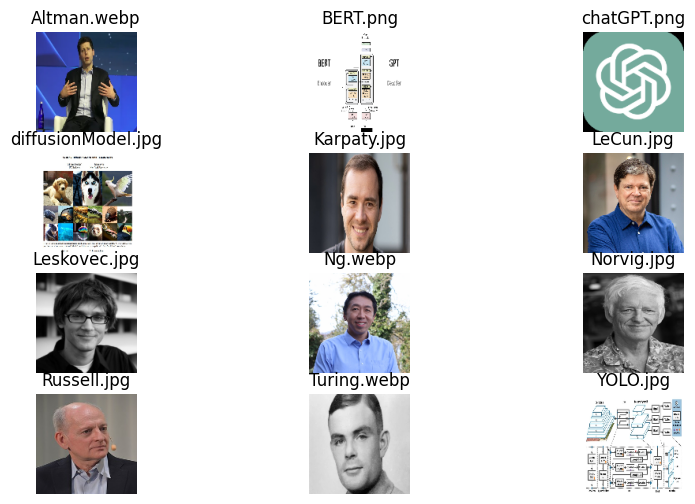

In [9]:
def resize_images_to_128(images, size=(128, 128)):
    return [cv2.resize(img, size) for img in images]

def table_display(images, titles, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
    for ax, img, title in zip(axes.flatten(), images, titles):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.set_title(title)
        ax.axis("off")
    plt.show()

resized_images = resize_images_to_128(images)


- sa se transforme imaginile in format gray-levels si sa se vizualizeze


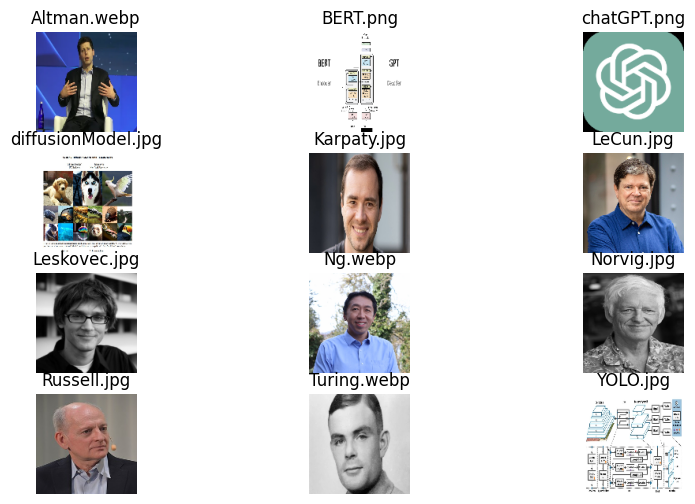

In [10]:
def convert_to_gray(images):
    return [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]


gray_images = convert_to_gray(resized_images)
table_display(resized_images, filenames, len(resized_images)//3, 3)


- sa se blureze o imagine si sa se afiseze in format "before-after"


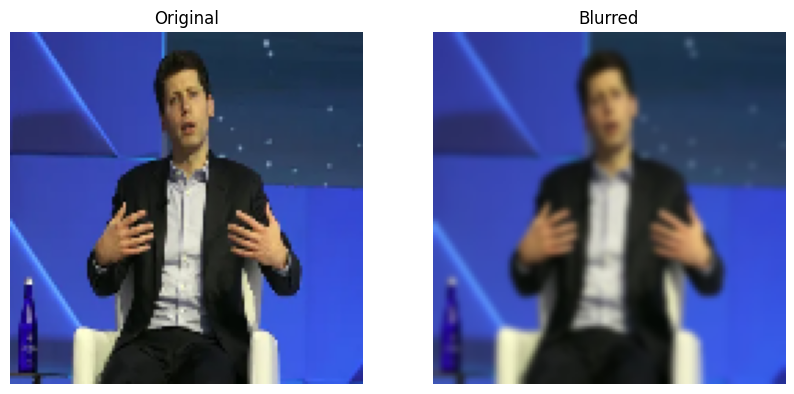

In [11]:
def blur_image(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

blurred = blur_image(resized_images[0])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(resized_images[0], cv2.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
ax[1].set_title("Blurred")
ax[1].axis("off")
plt.show()


- sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

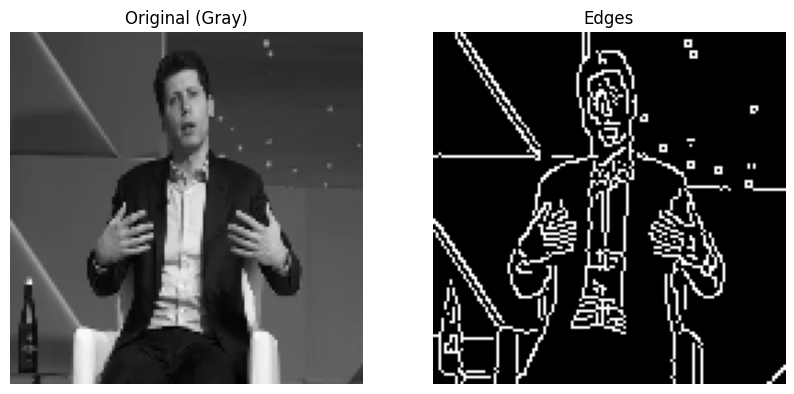

In [12]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)

edges = detect_edges(gray_images[0])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_images[0], cmap="gray")
ax[0].set_title("Original (Gray)")
ax[0].axis("off")
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges")
ax[1].axis("off")
plt.show()